# Enunciado

* Crear sus propios vectores con Gensim
basado en lo visto en clase con otro
dataset.
* Probar términos de interés y explicar
similitudes en el espacio de embeddings.
Intentar plantear y probar tests de
analogías. Graficar los embeddings
resultantes.
* Sacar conclusiones.



In [1]:
# Probar con algunas codificaciones comunes
encodings_to_try = ['utf-8', 'latin-1', 'windows-1252']

for encoding in encodings_to_try:
    try:
        with open('/content/07HarryPotterandtheDeathlyHallows.txt', 'r', encoding=encoding) as f:
            corpus = f.read()
        print(f"Successfully read the file with encoding: {encoding}")
        print(corpus[:500])  # Mostrar los primeros 500 caracteres
        break  # Si se lee correctamente, sale del bucle
    except UnicodeDecodeError as e:
        print(f"Failed to read with encoding {encoding}: {e}")


Failed to read with encoding utf-8: 'utf-8' codec can't decode byte 0xa3 in position 12: invalid start byte
Successfully read the file with encoding: latin-1
PK-   {T£X¢ÿÿÿÿÿÿÿÿ+  07 Harry Potter and the Deathly Hallows.txt  tí     £­     ¬½ËW%¸çWsjiÅHDt@&Ks·ëîÆ07ó´G8«üîÅ´HÕ¶?_2zÎQ½f¬)&"ÂÝì>ô­GU?S1^ºâÚ¢<SÙ§ªè¦±èöEÛ]©O¢,öéR\Ë¾ìCe?u[öÍ¶ìûî²)N]×6õX4enï»Þ¾2¤]×VøØµÆ®«LõìßuÓlKÙÚÓªºO»Ñ^YE*wÇ¢³Ï÷/bwLÃ8¼Ä×ÛMaêmýGÝÛä__T÷þØmjS9ýw»¦+ïmå¶a´ÕÛ/esmûz¸o®±¡<%_SÝµ·ÅþÛOé2¼úòÏ/Êá^o)Æ²iRuzü NrkÞàÃ}:7µ}üSzHý4Úòl'Ïàìý¶È®¯[/oÒ~,¶×âR7Õ¦hºËÍÁW«,OÛ&
øh_ülYíÛµmÊ¶ÞMxæ1U¡]­hÓÙü$ö
®Ú½ï¦


1. Cargar y preparar el dataset:


In [2]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Descargar los recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')

# Leer y preprocesar el texto
with open('/content/01HarryPotterandtheSorcerersStone.txt', 'r', encoding='latin-1') as f:
    corpus = f.read()

# Tokenización y eliminación de stopwords y puntuación
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(corpus.lower())
tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

# Crear oraciones (listas de palabras) para entrenar Word2Vec
sentences = [tokens]  # Si deseas dividir el corpus en oraciones, debes hacer un preprocesamiento adicional


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 2. Entrenar el modelo Word2Vec:

In [3]:
# Entrenar el modelo Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# Guardar el modelo
model.save("word2vec_harry_potter.model")

# Cargar el modelo (si ya fue guardado en algún punto anterior)
# model = Word2Vec.load("word2vec_harry_potter.model")



# Paso 3: Probar términos de interés y similitudes


In [4]:
# Palabras de interés
words_of_interest = ['harry', 'voldemort', 'hermione', 'hogwarts', 'magic']

# Mostrar similitudes entre palabras
for word in words_of_interest:
    if word in model.wv:
        print(f"Similar terms to '{word}':")
        print(model.wv.most_similar(word))
    else:
        print(f"'{word}' not found in the model vocabulary.")


Similar terms to 'harry':
[('hagrid', 0.9998736381530762), ('dudley', 0.9998558163642883), ('``', 0.999842643737793), ("n't", 0.9998422265052795), ('--', 0.999836802482605), ('back', 0.9998367428779602), ("''", 0.9998351335525513), ('said', 0.9998061060905457), ("'s", 0.999803900718689), ('one', 0.9997938871383667)]
Similar terms to 'voldemort':
[('bed', 0.9704914093017578), ('shops', 0.9704669713973999), ('potters', 0.9703881144523621), ('together', 0.9701158404350281), ('stopped', 0.9700236916542053), ("o'clock", 0.969990611076355), ('drive', 0.969961404800415), ('window', 0.9698367714881897), ('passed', 0.9696543216705322), ('something', 0.9694618582725525)]
Similar terms to 'hermione':
[('neville', 0.2685850262641907), ('brave', 0.26743847131729126), ('forgive', 0.23265959322452545), ('invisible', 0.23136207461357117), ('tree', 0.2282097190618515), ('sprang', 0.2239229381084442), ('minds', 0.20190852880477905), ('plant', 0.1916346251964569), ('halfway', 0.18714936077594757), ('bane

# Paso 4: Realizar tests de analogías


In [12]:
# Ejemplos de analogías
try:
    result = model.wv.most_similar(positive=['boy', 'magic'], topn=1) #, negative=['ron']
    print("Analogy result: 'boy' + 'magic' =", result)
except KeyError as e:
    print(f"Word not in vocabulary: {e}")


Analogy result: 'boy' + 'magic' = [('hagrid', 0.9997947216033936)]


# Paso 5: Graficar los embeddings
Para graficar los embeddings, puedes usar matplotlib y PCA para reducir las dimensiones a 2D.

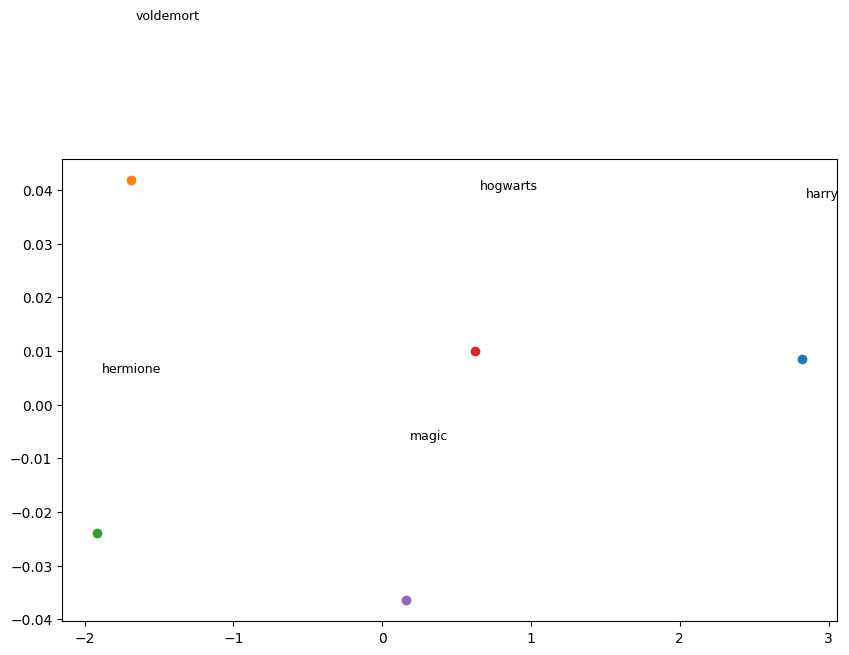

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Obtener los vectores de las palabras de interés
words = words_of_interest
word_vectors = [model.wv[word] for word in words if word in model.wv]

# Reducir a 2 dimensiones con PCA
pca = PCA(n_components=2)
word_vecs_2d = pca.fit_transform(word_vectors)

# Graficar
plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    if word in model.wv:
        plt.scatter(word_vecs_2d[i, 0], word_vecs_2d[i, 1])
        plt.text(word_vecs_2d[i, 0]+0.03, word_vecs_2d[i, 1]+0.03, word, fontsize=9)
plt.show()
